In [165]:

import os
os.chdir('C:\\Users\\btindol\\OneDrive - Stryker\\Linked In Learn\\Algorithmic Investing\Algorithmic Trading & Quantitative Analysis using Python')  
print(os.getcwd())  # Prints the current working directory

#####################################################################################################################################################
#imports 
#!pip install yfinance 
#!pip install pandas 
#!pip install numpy
#!pip install requests
#!pip install datetime
#!pip install yahoofinancials
!pip install stocktrends
from yahoofinancials import YahooFinancials

import pandas as pd
import numpy as np
import requests
import datetime as dt
import os
import json 
from functools import reduce
import statsmodels.api as sm
from stocktrends import Renko

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\btindol\OneDrive - Stryker\Linked In Learn\Algorithmic Investing\Algorithmic Trading & Quantitative Analysis using Python
  Created wheel for stocktrends: filename=stocktrends-0.1.4-py3-none-any.whl size=5229 sha256=bcd14b3d65e8409ead8992524116f28a04feca81685f814bff550d65d2d71c6b
  Stored in directory: c:\users\btindol\appdata\local\pip\cache\wheels\22\3a\96\14167f69c9a0ffa5e05071e5683a8ab1a204091cef643eb9ea
Successfully built stocktrends


You should consider upgrading via the 'c:\users\btindol\anaconda3\python.exe -m pip install --upgrade pip' command.


In [19]:
# One way of getting data!!!

all_tickers =  ['AMZN','MSFT','INCT','GOOG','INFY.NS','SYK']

# Used to make a dataframe of percent change from the daily price data!!!
def get_daily_returns(df):
    daily_return = df.pct_change()
    cols = daily_return.columns.tolist()
    newcols = []
    for j in range(0,len(cols)):
        if cols[j] == "formatted_date":
            colz = cols[j]
        else:
            colz = cols[j] + "_" + "percent_change"

        newcols.append(colz)
    daily_return.columns = newcols               
    return daily_return

def get_tickers(all_tickers):
    # get multiple tickers yahoo financials wants dates to be in string
    close_prices = pd.DataFrame()
    end_date = (dt.date.today()).strftime('%Y-%m-%d')
    beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d') # 1825 is 5 years ish 
    for ticker in all_tickers:
        yahoo_financials = YahooFinancials(ticker)
        json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
        ohlv = json_obj[ticker]['prices']
        temp = pd.DataFrame(ohlv)[["formatted_date","adjclose"]] # convert list of dictionaries into dataframe  just look at this pd.DataFrame(ohlv)
        temp.set_index("formatted_date",inplace=True) # make formatted date the index (best practice to have date in index for time series data)
        temp.dropna(inplace=True) # because dividend data might hapen and it creates NAN so remove this 
        close_prices[ticker]=temp["adjclose"]
    daily_return = get_daily_returns(close_prices)
    final = close_prices.merge(daily_return, on='formatted_date', how='left')
    return final


var = get_tickers(all_tickers)
var

,AMZN,MSFT,INCT,GOOG,INFY.NS,SYK,AMZN_percent_change,MSFT_percent_change,INCT_percent_change,GOOG_percent_change,INFY.NS_percent_change,SYK_percent_change
formatted_date,,,,,,,,,,,,
2016-05-09,679.750000,45.912781,94.339622,712.900024,522.911804,104.892509,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10,703.070007,46.783905,113.207550,723.179993,528.908203,105.297661,0.034307,0.018973,0.200000,0.014420,0.011467,0.003863
2016-05-11,713.229980,46.811417,122.641510,715.289978,524.132751,105.043259,0.014451,0.000588,0.083333,-0.010910,-0.009029,-0.002416
2016-05-12,717.929993,47.233212,122.641510,713.309998,527.687012,105.363632,0.006590,0.009011,0.000000,-0.002768,0.006781,0.003050
2016-05-13,709.919983,46.838917,103.773582,710.830017,526.487793,104.506172,-0.011157,-0.008348,-0.153846,-0.003477,-0.002273,-0.008138
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,3471.310059,252.509995,0.001200,2429.889893,1356.349976,263.429993,0.003704,-0.008053,0.200000,0.021001,0.000258,0.014832
2021-04-30,3467.419922,252.179993,0.001250,2410.120117,1354.349976,262.630005,-0.001121,-0.001307,0.041667,-0.008136,-0.001475,-0.003037
2021-05-03,3386.489990,251.860001,0.001100,2395.169922,1352.050049,263.100006,-0.023340,-0.001269,-0.120000,-0.006203,-0.001698,0.001790


In [48]:
cp_standardized = (var - var.mean())/var.std() # Standardization
cp_standardized

,adjclose_AMZN,percent_change_AMZN,adjclose_MSFT,percent_change_MSFT,adjclose_INCT,percent_change_INCT,adjclose_GOOG,percent_change_GOOG,adjclose_INFY.NS,percent_change_INFY.NS,adjclose_SYK,percent_change_SYK
formatted_date,,,,,,,,,,,,
2016-05-09,-1.309051,NaN,-1.269307,NaN,7.117566,NaN,-1.343203,NaN,-0.582593,NaN,-1.588852,NaN
2016-05-10,-1.280195,1.798569,-1.254464,1.026219,8.570931,NaN,-1.313756,0.797146,-0.558829,0.590672,-1.578620,0.178162
2016-05-11,-1.267623,0.714588,-1.253952,-0.044845,9.297228,NaN,-1.336357,-0.716527,-0.577761,-0.554411,-1.585109,-0.186528
2016-05-12,-1.261807,0.282091,-1.246786,0.444119,9.297228,NaN,-1.342028,-0.231912,-0.563661,0.328141,-1.577122,0.126877
2016-05-13,-1.271719,-0.692397,-1.253440,-0.562914,7.843864,NaN,-1.349132,-0.273792,-0.568414,-0.180164,-1.598336,-0.505631
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,2.145232,0.123326,2.255512,-0.551272,-0.148487,NaN,3.574989,1.192017,2.718407,-0.034934,2.367850,0.799273
2021-04-30,2.140419,-0.139457,2.249881,-0.155444,-0.148487,NaN,3.518359,-0.549006,2.710486,-0.135478,2.347884,-0.215019
2021-05-03,2.040276,-1.354830,2.244422,-0.155444,-0.148487,NaN,3.475536,-0.435331,2.701376,-0.146650,2.359614,0.058498


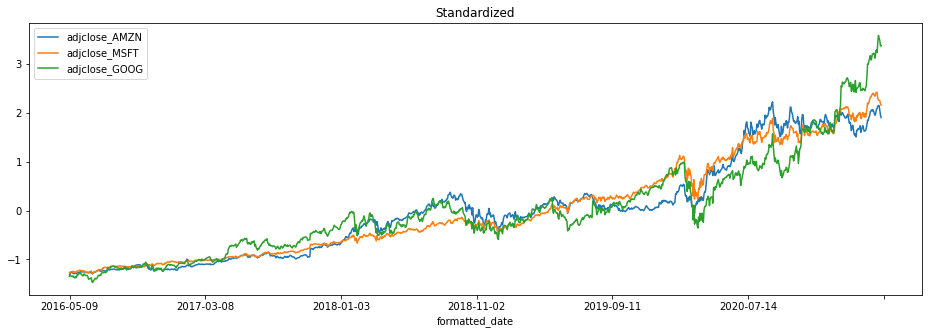

In [51]:
# Compare stocks standardized... 
cp_standardized['adjclose_AMZN'].plot(label='adjclose_AMZN',figsize=(16,5),title='Standardized')
cp_standardized['adjclose_MSFT'].plot(label='adjclose_MSFT')
cp_standardized['adjclose_GOOG'].plot(label='adjclose_GOOG')

plt.legend()

In [97]:
# Another way of getting all the data
list_of_stocks = ['AMZN','MSFT','INCT','GOOG','INFY.NS','SYK']

def get_ticker_data(list_of_stocks):
    list_of_dataframes = []
    for i in range(0,len(list_of_stocks)):
        #print(list_of_stocks[i])
        yahoo_financials = YahooFinancials(list_of_stocks[i])
        end_date = (dt.date.today()).strftime('%Y-%m-%d')
        beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d') # 1825 is 5 years ish 
        api_dictionary_data = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
        dict_to_json = json.dumps(api_dictionary_data) # converts dictionary into json string not subsettable
        json_from_dict= json.loads(dict_to_json)      # convert dict to jason
        df = pd.json_normalize(json_from_dict[list_of_stocks[i]]['prices']) # subset the prices part of the dictionaries 
        df = pd.DataFrame(df)
        #df = df[['formatted_date','adjclose']]
        df['high'] =df['high'].round(decimals=2)# rounding columns off 
        df['low']=df['low'].round(decimals=2)
        df['open']= df['open'].round(decimals=2)
        df['close']=df['close'].round(decimals=2)
        df['volume']= df['volume'].round(decimals=2)
        df['adjclose']=df['adjclose'].round(decimals=2)
        df["percent_change"] = round(df["adjclose"].pct_change(1),4)
        cols = df.columns.tolist()

        # Rename the columns to paste the name of the ticker to the column name to know which one its from 
        newcols = []
        for j in range(0,len(cols)):
            if cols[j] == "formatted_date":
                colz = cols[j]
            else:
                colz = cols[j] + "_" + list_of_stocks[i]
           
            newcols.append(colz)
        df.columns = newcols                         # replace old column to noew

        list_of_dataframes.append(df)
    
    # This takes all the dataframes made from the tickers and takes the only column not mreged from them aka formatted date and left joins them all 
    varz = reduce(lambda x, y: pd.merge(x, y, on = 'formatted_date'), list_of_dataframes)
    varz.set_index("formatted_date",inplace=True)
    return varz

In [98]:
var = get_ticker_data(list_of_stocks)
var

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,date_MSFT,high_MSFT,...,adjclose_INFY.NS,percent_change_INFY.NS,date_SYK,high_SYK,low_SYK,open_SYK,close_SYK,volume_SYK,adjclose_SYK,percent_change_SYK
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,1462800600,50.59,...,522.91,NaN,1462800600,112.23,111.12,111.13,111.32,960600,104.89,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,1462887000,51.10,...,528.91,0.0115,1462887000,111.91,111.11,111.38,111.75,1669900,105.30,0.0039
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,1462973400,51.78,...,524.13,-0.0090,1462973400,112.37,111.37,111.81,111.48,1439900,105.04,-0.0025
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,1463059800,51.81,...,527.69,0.0068,1463059800,112.31,110.85,111.52,111.82,1048200,105.36,0.0030
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,1463146200,51.90,...,526.49,-0.0023,1463146200,112.01,110.41,111.91,110.91,1050700,104.51,-0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,1619703000,256.10,...,1356.35,0.0003,1619703000,263.96,259.81,260.25,263.43,943700,263.43,0.0148
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,1619789400,253.08,...,1354.35,-0.0015,1619789400,263.71,259.98,263.00,262.63,1071100,262.63,-0.0030
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,1620048600,254.35,...,1352.05,-0.0017,1620048600,264.36,262.29,263.53,263.10,1032800,263.10,0.0018


# One Stock Analysis Make One Big Function At End

In [99]:
list_of_stocks = ['AMZN']

df = get_ticker_data(list_of_stocks)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN
formatted_date,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112
...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233


# Indicators

In [100]:
# Get moving average of price
df['MA_5_Day'] = df['adjclose_AMZN'].rolling(window=5).mean() # 5 day price moving average
df['MA_30_Day'] = df['adjclose_AMZN'].rolling(window=30).mean() # 30 day price moving average
df['MA_90_Day'] = df['adjclose_AMZN'].rolling(window=90).mean() # 90 day price moving average

# Exponentially weighted moving average
df['EWA_5_Day'] = df['adjclose_AMZN'].ewm(span=5,min_periods=5).mean() # 5 day price moving average
df['EWA_30_Day'] = df['adjclose_AMZN'].ewm(span=30,min_periods=30).mean() # 30 day price moving average
df['EWA_90_Day'] = df['adjclose_AMZN'].ewm(span=90,min_periods=90).mean() # 90 day price moving average

# Moving standard deviation
df['std_5_Day'] = df['adjclose_AMZN'].rolling(window=5).std() # 5 day price moving average
df['std_30_Day'] = df['adjclose_AMZN'].rolling(window=30).std() # 30 day price moving average
df['std_90_Day'] = df['adjclose_AMZN'].rolling(window=90).std() # 90 day price moving average

# Making confidence range 2 times std
df['std_30_Day_Upper'] =df['MA_5_Day'] + df['std_30_Day'] # 5 day std upper limmit
df['std_30_Day_Lower'] =df['MA_5_Day'] - df['std_30_Day'] # 5 day std lower limit
df['std_30_Day_Upper_2'] =df['MA_5_Day'] + (df['std_30_Day'] *2) # 5 day std upper limmit
df['std_30_Day_Lower_2'] =df['MA_5_Day'] - (df['std_30_Day']*2) # 5 day std lower limit

# get percent change moving average
df['MA_5_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=5).mean() # 5 day percent change (one week )
df['MA_30_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=30).mean() # 30 day percent change moving average
df['MA_90_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=90).mean() # 90 day percent change moving average


In [101]:
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,std_5_Day,std_30_Day,std_90_Day,std_30_Day_Upper,std_30_Day_Lower,std_30_Day_Upper_2,std_30_Day_Lower_2,MA_5_Day_pct_chg,MA_30_Day_pct_chg,MA_90_Day_pct_chg
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,15.001413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,51.236917,145.649237,121.973164,3565.073237,3273.774763,3710.722473,3128.125527,0.00964,0.003483,0.000903
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,29.295342,143.980003,124.807722,3588.712003,3300.751997,3732.692006,3156.771994,0.00750,0.004593,0.001009
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,36.901501,140.548144,126.042551,3580.778144,3299.681856,3721.326289,3159.133711,-0.00124,0.003300,0.000734


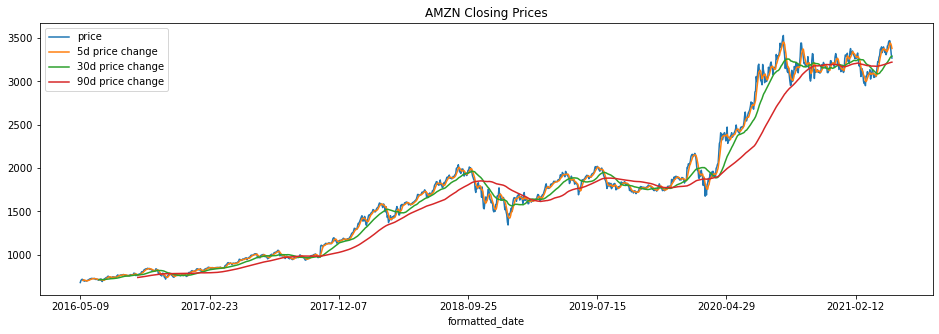

In [102]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

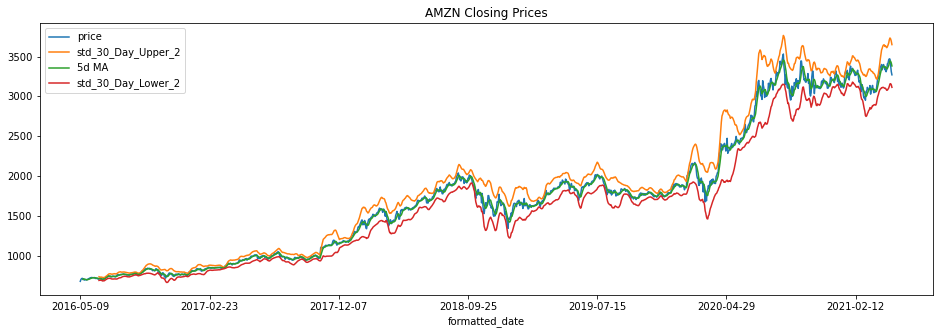

In [103]:
# Moving standard deviation averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
#df['std_30_Day_Upper'].plot(label='std_30_Day_Upper')
df['std_30_Day_Upper_2'].plot(label='std_30_Day_Upper_2')
df['MA_5_Day'].plot(label='5d MA')
#df['std_30_Day_Lower'].plot(label='std_30_Day_Lower')
df['std_30_Day_Lower_2'].plot(label='std_30_Day_Lower_2')


plt.legend()

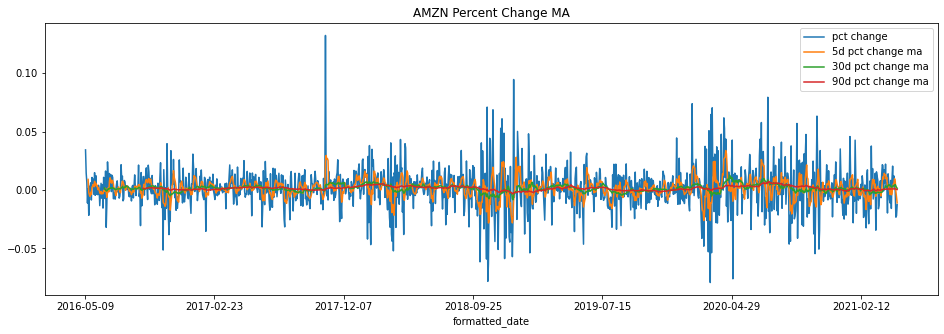

In [104]:
# Look into percent change volitility?? 
# Look into volume?? 
df['percent_change_AMZN'].plot(label='pct change',figsize=(16,5),title='AMZN Percent Change MA')
df['MA_5_Day_pct_chg'].plot(label='5d pct change ma')
df['MA_30_Day_pct_chg'].plot(label='30d pct change ma')
df['MA_90_Day_pct_chg'].plot(label='90d pct change ma')
plt.legend()

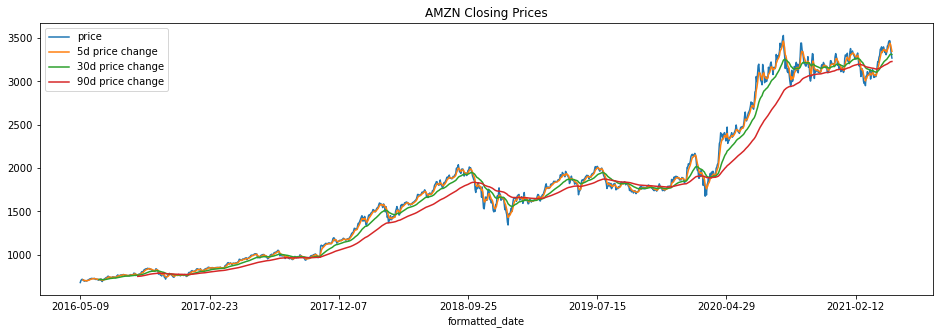

In [105]:
# exponential weighted moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['EWA_5_Day'].plot(label='5d price change')
df['EWA_30_Day'].plot(label='30d price change')
df['EWA_90_Day'].plot(label='90d price change')
plt.legend()

In [106]:
# mRSI 

# What Is the Relative Strength Index (RSI)?
# The relative strength index (RSI) is a momentum indicator used in technical analysis that
#measures the magnitude of recent price changes to evaluate overbought or oversold conditions in
#the price of a stock or other asset. 
#The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a
#reading from 0 to 100. The indicator was originally developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book,
#"New Concepts in Technical Trading Systems."
# Traditional interpretation and usage of the RSI are that values of 70 or above indicate that a security is becoming overbought
#or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates
#an oversold or undervalued condition.

In [107]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n]) # first value is average of gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n]) # first value is average of losses
    d = d.drop(d.index[:(n-1)])
    rs = u.ewm(com=n,min_periods=n).mean()/d.ewm(com=n,min_periods=n).mean()
    return 100 - 100 / (1+rs)

#rsi(ohlcv["Adj Close"],14)

In [108]:
df["RSI_AMZN_15"] = rsi(df["adjclose_AMZN"],15)
df["RSI_AMZN_30"] = rsi(df["adjclose_AMZN"],30)

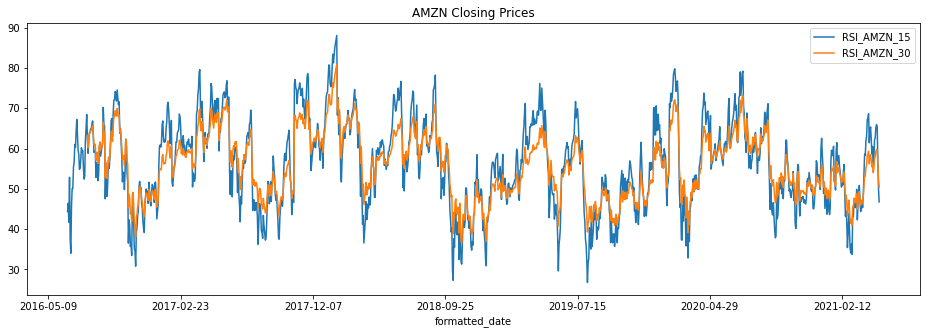

In [109]:
# exponential weighted moving averages
# Make confidence intervalse for the RSI

df['RSI_AMZN_15'].plot(label='RSI_AMZN_15',figsize=(16,5),title='AMZN Closing Prices')
df['RSI_AMZN_30'].plot(label='RSI_AMZN_30')
#df['RSI_AMZN_15'].plot(label='RSI_AMZN_15')
plt.legend()

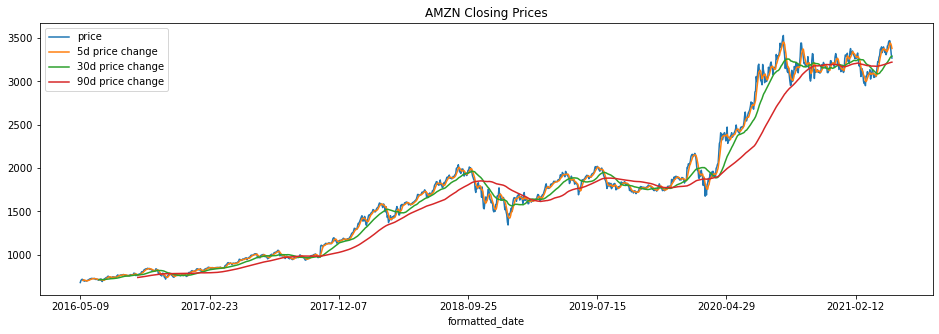

In [110]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [125]:
# ATR Average true range
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#  To measure recent volatility, use a shorter average, such as 2 to 10 periods. For longer-term volatility, use 20 to 50 periods.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atr
#Average True Range (ATR) is the average of true ranges over the specified period.
#ATR measures volatility, taking into account any gaps in the price movement. 
#Typically, the ATR calculation is based on 14 periods, which can be intraday, daily, weekly, or monthly. 
#To measure recent volatility, use a shorter average, such as 2 to 10 periods. 
#For longer-term volatility, use 20 to 50 periods.

# This function can be onlyu used on a dataframe of one stock at a time otherwise it will grab multiple high_ticker columns

def ATR(df,n):
    "function to calculate True Range and Average True Range"
    highcol = [col for col in df.columns if 'high' in col] # grab the column name that contains high
    lowcol = [col for col in df.columns if 'low' in col]
    adjclosecol = [col for col in df.columns if 'adjclose' in col]
    df['High']= df[highcol] # paste that name make a new column that fites the function that the course allowed
    df['Low'] = df[lowcol]
    df['Adj Close'] = df[adjclosecol]
    df = df.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    #df['ATR'] = df['TR'].rolling(n).mean()
    df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean() # 14 periods exponential weighted moving average to measure longer volitility use 90 day
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

df = ATR(df,14)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_30_Day_pct_chg,MA_90_Day_pct_chg,RSI_AMZN_15,RSI_AMZN_30,High,Low,Adj Close,TR,ATR,ADX
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,686.98,671.41,679.75,NaN,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,704.55,693.50,703.07,24.80,NaN,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,719.00,701.65,713.23,17.35,NaN,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,722.45,711.51,717.93,10.94,NaN,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,NaN,NaN,NaN,NaN,719.25,706.51,709.92,12.74,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,0.003483,0.000903,65.945945,59.783942,3514.45,3435.00,3471.31,79.45,70.358095,27.256933
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,0.004593,0.001009,65.481923,59.583741,3554.00,3462.50,3467.42,91.50,73.177015,28.763423
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,0.003300,0.000734,56.637977,55.582274,3486.65,3372.70,3386.49,113.95,78.613413,28.250460


In [ ]:
# ADX AVERAGE DIRECTIONAL MOVEMENT
#https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp
# ADX values help traders identify the strongest and most profitable trends to trade. 
#The values are also important for distinguishing between trending and non-trending conditions. 
#Many traders will use ADX readings above 25 to suggest that the trend is strong enough for trend-trading strategies. 
#Conversely, when ADX is below 25, many will avoid trend-trading strategies.


# ADX Value	Trend Strength
# 0-25	Absent or Weak Trend
# 25-50	Strong Trend
# 50-75	Very Strong Trend
# 75-100	Extremely Strong Trend

In [126]:

def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

df['ADX'] = ADX(df,14)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_30_Day_pct_chg,MA_90_Day_pct_chg,RSI_AMZN_15,RSI_AMZN_30,High,Low,Adj Close,TR,ATR,ADX
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,686.98,671.41,679.75,NaN,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,704.55,693.50,703.07,24.80,NaN,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,719.00,701.65,713.23,17.35,NaN,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,722.45,711.51,717.93,10.94,NaN,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,NaN,NaN,NaN,NaN,719.25,706.51,709.92,12.74,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,0.003483,0.000903,65.945945,59.783942,3514.45,3435.00,3471.31,79.45,70.358095,27.256933
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,0.004593,0.001009,65.481923,59.583741,3554.00,3462.50,3467.42,91.50,73.177015,28.763423
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,0.003300,0.000734,56.637977,55.582274,3486.65,3372.70,3386.49,113.95,78.613413,28.250460


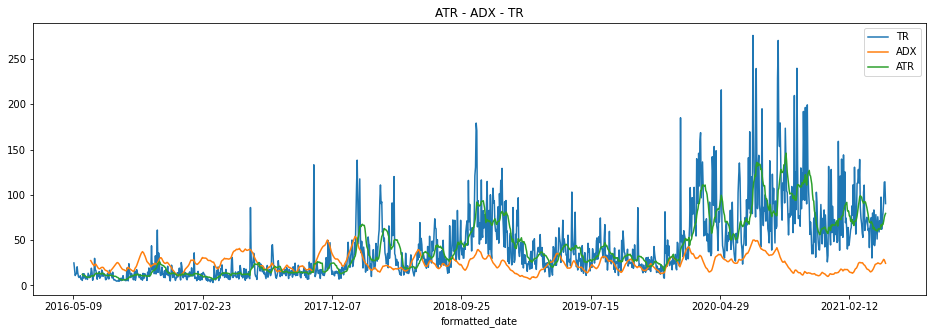

In [124]:
# Visualizing adx, atr, tr together
# Regular moving averages
df['TR'].plot(label='TR',figsize=(16,5),title='ATR - ADX - TR')
df['ADX'].plot(label='ADX')
df['ATR'].plot(label='ATR')
plt.legend()

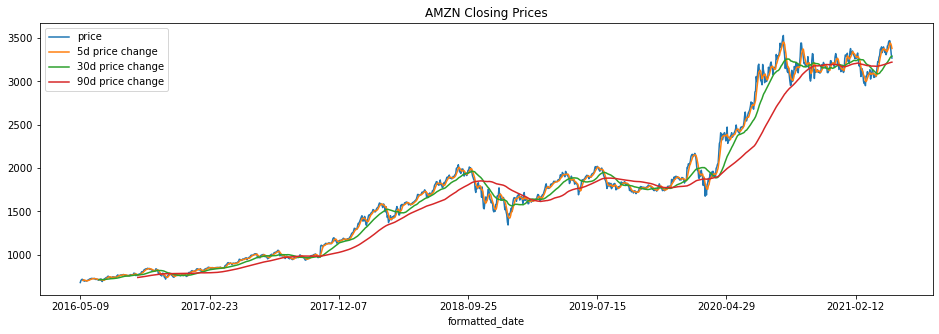

In [127]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [132]:
# Moving average convergence and divergence
#The Formula for MACD Is:
#MACD=12-Period EMA − 26-Period EMA

# KEY TAKEAWAYS
# Moving average convergence divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
# MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
# The speed of crossovers is also taken as a signal of a market is overbought or oversold.
# MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.

def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

df = MACD(df, 12, 26, 9)  # 9 is the number of periods for the exponenetial moving average
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,High,Low,Adj Close,TR,ATR,ADX,MA_Fast,MA_Slow,MACD,Signal
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,770.87,757.58,769.69,13.29,10.975423,16.669044,769.026928,766.196285,2.830643,4.583933
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,780.46,771.66,778.52,10.77,10.948033,16.150476,770.487401,767.109922,3.377479,4.342642
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,781.94,771.00,775.10,10.94,10.946962,15.816928,771.197032,767.702241,3.494791,4.173072
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,781.37,776.00,780.22,6.27,10.323367,15.507204,772.585181,768.630152,3.955029,4.129463
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,790.69,779.01,789.74,11.68,10.504251,16.124495,775.224384,770.194889,5.029495,4.309470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,3514.45,3435.00,3471.31,79.45,70.358095,27.256933,3382.812989,3313.028766,69.784223,62.696138
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,3554.00,3462.50,3467.42,91.50,73.177015,28.763423,3395.829453,3324.465154,71.364299,64.429770
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,3486.65,3372.70,3386.49,113.95,78.613413,28.250460,3394.392614,3329.059587,65.333027,64.610421


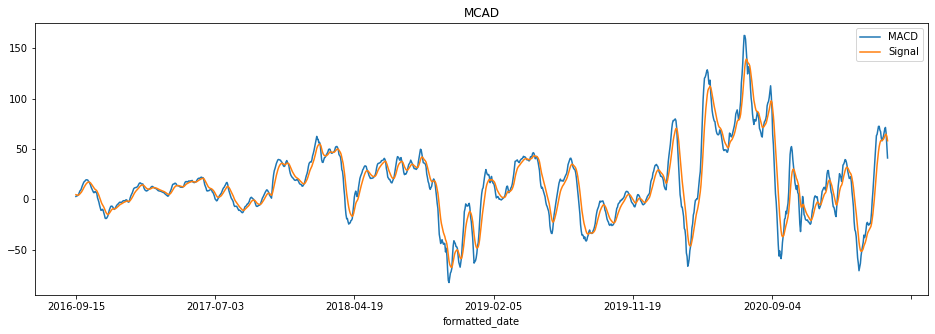

In [134]:
#MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
df['MACD'].plot(label='MACD',figsize=(16,5),title='MCAD')
df['Signal'].plot(label='Signal')

plt.legend()

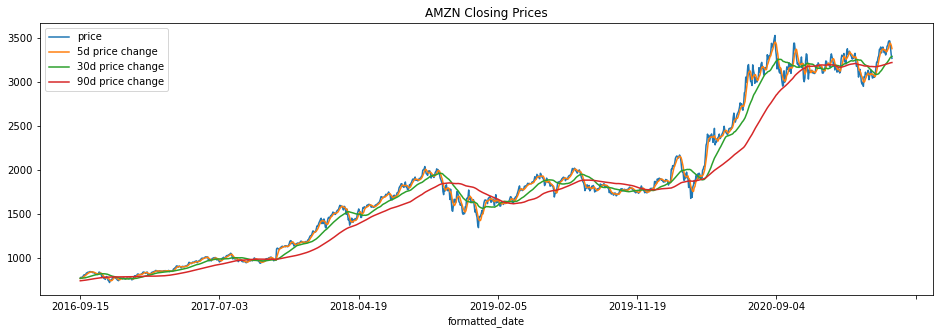

In [135]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [153]:
# OBV On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume on up days and
#subtracts volume on down days. When the security closes higher than the previous close, all of the day's volume is considered 
#up-volume.

# KEY TAKEAWAYS
# On-balance volume (OBV) is a technical indicator of momentum, using volume changes to make price predictions.
# OBV shows crowd sentiment that can predict a bullish or bearish outcome.
# Comparing relative action between price bars and OBV generates more actionable signals than the green or red volume histograms commonly found at the bottom of price charts. 



def OBV(DF):
    """function to calculate On Balance Volume"""
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    volumecol = [col for col in DF.columns if 'volume' in col]
    DF['Adj Close'] = DF[adjclosecol]
    DF['Volume'] = DF[volumecol]
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0 # because first percent change so in direction first value will be na when comparing so need to make it 0 
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']

df['On Balance Volume'] = OBV(df)
df #2465200

<ipython-input-153-a5c7482de95a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0 # because first percent change so in direction first value will be na when comparing so need to make it 0


,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_Fast,MA_Slow,MACD,Signal,daily_ret,direction,Volume,vol_adj,obv,On Balance Volume
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,769.026928,766.196285,2.830643,4.583933,NaN,-1,3034000,-3034000,-3034000,0
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,770.487401,767.109922,3.377479,4.342642,0.011472,1,5499200,5499200,2465200,5499200
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,771.197032,767.702241,3.494791,4.173072,-0.004393,-1,2297200,-2297200,168000,3202000
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,772.585181,768.630152,3.955029,4.129463,0.006606,1,1937200,1937200,2105200,5139200
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,775.224384,770.194889,5.029495,4.309470,0.012202,1,2718600,2718600,4823800,7857800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,3382.812989,3313.028766,69.784223,62.696138,0.003704,1,7682400,7682400,381449400,384483400
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,3395.829453,3324.465154,71.364299,64.429770,-0.001121,-1,7001800,-7001800,374447600,377481600
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,3394.392614,3329.059587,65.333027,64.610421,-0.023340,-1,5875500,-5875500,368572100,371606100


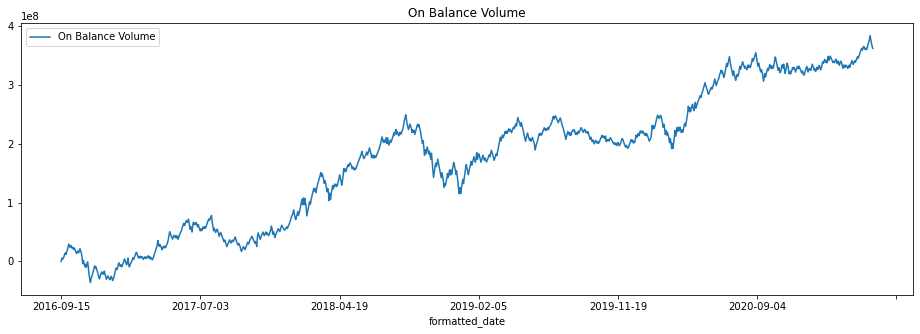

In [159]:
#MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
df['On Balance Volume'].plot(label='On Balance Volume',figsize=(16,5),title='On Balance Volume')
#df['Volume'].plot(label='Volume')

plt.legend()

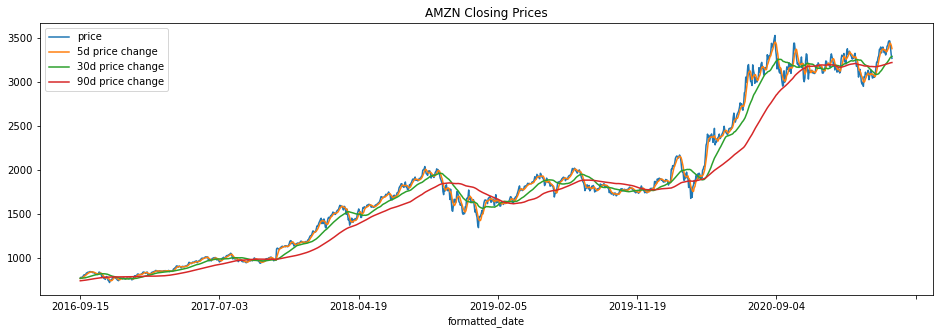

In [160]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [157]:
# SLOPE 

"""
def slope(ser,n):
    '''function to calculate the slope of line connecting a point with n-previous point
     slope assumes a frame with 22 units in the x axis and span of min to max in y axis'''
    y_span = ser.max() - ser.min()
    x_span = 22
    slopes = [i*0 for i in range(n-1)]
    for i in range(n-1,len(ser)):
        y2 = ser[i]
        y1 = ser[i-n+1]
        slope = ((y2-y1)/y_span)/(n/x_span)
        slopes.append(slope)
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

"""

# LOOK INTO THIS FUNCTION BREAK IT DOWN 
def slope(ser,n):
    "function to calculate the slope of regression line for n consecutive points on a plot"
    ser = (ser - ser.min())/(ser.max() - ser.min())
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1): # from 5 to the length of the column +1
        y_scaled = ser[i-n:i]       # for each row minus 5: that row your on
        x_scaled = x[:n]            # get the stardardized version of the range of that 
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

df["close_slope"] = slope(df["adjclose_AMZN"],5) # This gives you the slope of the last 5 points 
df


,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_Slow,MACD,Signal,daily_ret,direction,Volume,vol_adj,obv,On Balance Volume,close_slope
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,766.196285,2.830643,4.583933,NaN,-1,3034000,-3034000,-3034000,0,0.000000
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,767.109922,3.377479,4.342642,0.011472,1,5499200,5499200,2465200,5499200,0.000000
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,767.702241,3.494791,4.173072,-0.004393,-1,2297200,-2297200,168000,3202000,0.000000
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,768.630152,3.955029,4.129463,0.006606,1,1937200,1937200,2105200,5139200,0.000000
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,770.194889,5.029495,4.309470,0.012202,1,2718600,2718600,4823800,7857800,60.013720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-29,1619703000,3514.45,3435.00,3505.10,3471.31,7682400,3471.31,0.0037,3419.424,3256.334000,...,3313.028766,69.784223,62.696138,0.003704,1,7682400,7682400,381449400,384483400,85.556141
2021-04-30,1619789400,3554.00,3462.50,3525.12,3467.42,7001800,3467.42,-0.0011,3444.732,3270.981667,...,3324.465154,71.364299,64.429770,-0.001121,-1,7001800,-7001800,374447600,377481600,81.958284
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,3329.059587,65.333027,64.610421,-0.023340,-1,5875500,-5875500,368572100,371606100,-65.513766


In [166]:
# RENKO 

# def ATR(DF,n):
#     "function to calculate True Range and Average True Range"
#     df = DF.copy()
#     df['H-L']=abs(df['High']-df['Low'])
#     df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
#     df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
#     df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
#     df['ATR'] = df['TR'].rolling(n).mean()
#     df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
#     return df2

def renko_DF(DF):
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    volumecol = [col for col in DF.columns if 'volume' in col]
    opencol = [col for col in DF.columns if 'open' in col]
    datecol = [col for col in DF.columns if 'date' in col]
    highcol = [col for col in DF.columns if 'high' in col]
    lowcol = [col for col in DF.columns if 'low' in col]
    DF['Adj Close'] = DF[adjclosecol]
    DF['Volume'] = DF[volumecol]
    DF['Date'] = DF[datecol]
    DF['Open'] = DF[opencol]
    DF['High'] = DF[highcol]
    DF['Low'] = DF[lowcol]
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.loc[:,["Date","Open","High","Low","Adj Close","Volume"]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df

df2 = renko_DF(df)
df2

C:\Users\btindol\Anaconda3\lib\site-packages\stocktrends\indicators.py:58: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  self.cdf.loc[0, 1:] = [close - brick_size, close, close - brick_size, close]


,date,open,high,low,close,uptrend
0,1.473946e+09,632.0,711.0,632.0,711.0,True
1,1.474551e+09,711.0,790.0,711.0,790.0,True
2,1.490794e+09,790.0,869.0,790.0,869.0,True
3,1.493645e+09,869.0,948.0,869.0,948.0,True
4,1.500557e+09,948.0,1027.0,948.0,1027.0,True
...,...,...,...,...,...,...
98,1.614868e+09,3081.0,3081.0,3002.0,3002.0,False
99,1.617284e+09,3081.0,3160.0,3081.0,3160.0,True
100,1.617802e+09,3160.0,3239.0,3160.0,3239.0,True
101,1.617975e+09,3239.0,3318.0,3239.0,3318.0,True
